# Default Perturbation network analysis notebook
This notebook was automatically generated using freenrgworkflows   
Author: Antonia Mey   
Email: antonia.mey@ed.ac.uk

In [26]:
%pylab inline
import networkanalysis.networkanalysis as n_graph
import networkanalysis.plotting as n_plot
import networkanalysis.experiments as n_ex
import networkanalysis.stats as n_stats
import networkanalysis
networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


/home/ppxasjsm/miniconda3/envs/fworkflow/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


'1.0.1-py3.7.egg'

In [27]:
pG.add_data_to_graph

<bound method PerturbationGraph.add_data_to_graph of <networkanalysis.networkanalysis.PerturbationGraph object at 0x7fe903e4d5f8>>

In [28]:
# Creating and populating the perturbation network
pG = n_graph.PerturbationGraph()
# Change the path below to the csv file containing the individual perturbations
pG.populate_pert_graph('run1.csv')
pG.add_data_to_graph('run2.csv')
# Uncomment below if you have run multiple runs for some perturbations and add file path
#pG.add_data_to_graph('/path/to/additional/runs.csv')
target_compound = pG.compoundList[0] #change this to your target comound
pG.compute_weighted_avg_paths(target_compound)
pG.format_free_energies(merge_BM=True,intermed_ID='INT')
computed_relative_DDGs = pG.freeEnergyInKcal
print ("Free energies computed from the perturbation network are: ")
print ("---------------------------------------- ")
pG.write_free_energies(computed_relative_DDGs)

Free energies computed from the perturbation network are: 
---------------------------------------- 
#FREE ENERGIES ARE:
Tyk_1      -0.000 ± 0.000
Tyk_10     3.633 ± 0.311
Tyk_11     -0.855 ± 0.261
Tyk_12     0.547 ± 0.364
Tyk_13     0.095 ± 0.223
Tyk_14     -0.963 ± 0.285
Tyk_15     -0.070 ± 0.065
Tyk_16     -1.264 ± 0.178
Tyk_17     1.178 ± 0.103
Tyk_2      -1.066 ± 0.289
Tyk_3      0.320 ± 0.153
Tyk_4      -0.911 ± 0.221
Tyk_5      -0.611 ± 0.155
Tyk_6      1.483 ± 0.258
Tyk_7      -0.094 ± 0.280
Tyk_8      0.544 ± 0.305
Tyk_9      -0.338 ± 0.043



### Experimental data
It is useful to compare computed free energies to experimental data.
The cells below will read in your experimental data. Just replace the path to you IC50 data in the
`IC_50_file` variable 

In [29]:
f = open('../tyk2_ds_dGexp_abs.csv')
lines = f.readlines()
f.close()

In [34]:
exp_list = []
for l in lines:
    a = l.strip().split(',')
    if a[0].startswith("#"):
        continue
    if a[0] == 'tyk_1':
        reference = float(a[1])
    b = {a[0]:float(a[1])-reference, 'error':0.4}
    exp_list.append(b)
    print(a)

['Tyk_1', '-9.54']
['Tyk_2', '-10.94']
['Tyk_3', '-8.98']
['Tyk_4', '-11.31']
['Tyk_5', '-9.21']
['Tyk_6', '-8.26']
['Tyk_7', '-10.98']
['Tyk_8', '-7.75']
['Tyk_9', '-9.56']
['Tyk_10', '-7.42']
['Tyk_11', '-11.28']
['Tyk_12', '-9']
['Tyk_13', '-9.7']
['Tyk_14', '-11.7']
['Tyk_15', '-9.78']
['Tyk_16', '-10.53']


In [35]:
dG_file = '../tyk2_ds_dGexp_abs.csv'
pG.write_free_energies(exp_list)

#FREE ENERGIES ARE:
Tyk_1      0.000 ± 0.400
Tyk_2      -1.400 ± 0.400
Tyk_3      0.560 ± 0.400
Tyk_4      -1.770 ± 0.400
Tyk_5      0.330 ± 0.400
Tyk_6      1.280 ± 0.400
Tyk_7      -1.440 ± 0.400
Tyk_8      1.790 ± 0.400
Tyk_9      -0.020 ± 0.400
Tyk_10     2.120 ± 0.400
Tyk_11     -1.740 ± 0.400
Tyk_12     0.540 ± 0.400
Tyk_13     -0.160 ± 0.400
Tyk_14     -2.160 ± 0.400
Tyk_15     -0.240 ± 0.400
Tyk_16     -0.990 ± 0.400



### Typical plots
Below a bar plot and scatter plot template for comparing experimental and computed free energy values

['Tyk_1' 'Tyk_10' 'Tyk_11' 'Tyk_12' 'Tyk_13' 'Tyk_14' 'Tyk_15' 'Tyk_16'
 'Tyk_2' 'Tyk_3' 'Tyk_4' 'Tyk_5' 'Tyk_6' 'Tyk_7' 'Tyk_8' 'Tyk_9']


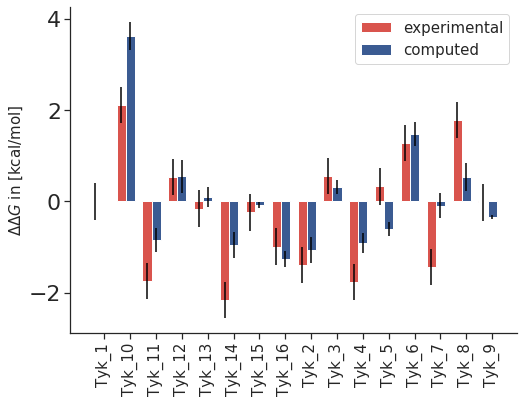

In [36]:
plotter = n_plot.FreeEnergyPlotter(exp_list, computed_relative_DDGs)
ax,fig = plotter.plot_bar_plot(legend=('experimental', 'computed'))

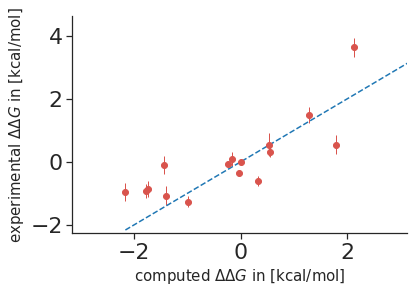

In [37]:
plotter.plot_scatter_plot() 


### Error analysis on typical statistical measures: R_mean, MUE and Kendall tau_mean
Below are examples of how to re-sample from the data in order to obtain error bars on correlation coefficients, 
mean unsigned errors and Kendall tau. Returned are confidence intervals of 65% and the median of the distribution.
 However, standard deviations and mean can also 
be returned, though less likely to give good information as these distributions are often heavily skewed and not 
normally distributed. 

In [39]:
stats = n_stats.freeEnergyStats()
stats.generate_statistics(computed_relative_DDGs,exp_list,repeats=10000)
r_confidence = stats.R_confidence
tau_confidence = stats.tau_confidence
mue_confidence = stats.mue_confidence
print ("R confidence is: %.2f < %.2f < %.2f" %(r_confidence[1], r_confidence[0], r_confidence[2]))
print ("Mue confidence is: %.2f < %.2f < %.2f" %(mue_confidence[1], mue_confidence[0], mue_confidence[2]))
print ("tau confidence is: %.2f < %.2f < %.2f" %(tau_confidence[1], tau_confidence[0], tau_confidence[2]))

R confidence is: 0.78 < 0.80 < 0.81
Mue confidence is: 0.61 < 0.64 < 0.66
tau confidence is: 0.60 < 0.63 < 0.65
